### [Question 1] [15 points]
Design a convolutional neural network in Keras of at least 10 convolutional layers. Use the MNIST
dataset for evaluation. You must try three designs as detailed below and provide your
observations on the performance of each:
1. A regular CNN where the number of filters in each layer increases as the depth of the
network grows i.e., the Lth layer will have more filters than the (L-1)th layer.
2. An inverted CNN where the number of filters in each layer decreases as the depth of the
network grows i.e., the Lth layer will have less filters than the (L-1)th layer.
3. An hour-glass shaped CNN where the number of filters will increase till the Lth layer and
reduce afterwards.
Your goal is to design these networks and optimize them to their best performance by choosing
the right hyperparameters for each network, such as the learning rate, batch size and the choice
of optimizer (‘SGD’, ‘adam’, ‘RMSProp’). You must provide a detailed report of what values you
tried for each hyperparameters, your observations on why the network performed well (or not)
and the final accuracy for each network on the MNIST dataset.
You can refer to the Keras documentation for more details.

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Shorten the dataset to 10000 images
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:10000]
test_labels = test_labels[:10000]

train_images = train_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images.shape, test_images.shape

((10000, 28, 28, 1), (10000, 28, 28, 1))

# Regular CNN

In [22]:
from tensorflow.keras import layers, models

def reg_cnn():
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(160, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(224, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model


# Inverted CNN

In [24]:
def inv_cnn():
    model = Sequential()
    
    model.add(Conv2D(224, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(160, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model


# Hourglass CNN

In [30]:
def hourglass_cnn():
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    # model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model


In [31]:
# from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# hyperparameter combinations
optimizers = [SGD, Adam, RMSprop]
learning_rates = [0.001, 0.01]
batch_sizes = [256, 512]

results = []
for model_func in [hourglass_cnn, reg_cnn, inv_cnn]:
    for optimizer in optimizers:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:

                print(f'Training {model_func.__name__} with {optimizer.__name__}, lr={learning_rate}, batch_size={batch_size}')

                model = model_func()
                
                model.compile(optimizer=optimizer(learning_rate=learning_rate),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])
                
                model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2)
                
                test_loss, test_accuracy = model.evaluate(test_images, test_labels)
                
                results.append({
                    'Model': model_func.__name__,
                    'Optimizer': optimizer.__name__,
                    'Learning Rate': learning_rate,
                    'Batch Size': batch_size,
                    'Accuracy': test_accuracy
                })

for result in results:
    print(result)

Training hourglass_cnn with SGD, lr=0.001, batch_size=256


ValueError: Exception encountered when calling layer "max_pooling2d_28" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_28/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,16].

Call arguments received by layer "max_pooling2d_28" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 16), dtype=float32)

In [ ]:
# {'Model': 'reg_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.1177000030875206}
# {'Model': 'reg_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.10300000011920929}
# {'Model': 'reg_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.6219000220298767}
# {'Model': 'reg_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.3677999973297119}
# {'Model': 'reg_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.9668999910354614}
# {'Model': 'reg_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.9437999725341797}
# {'Model': 'reg_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.9708999991416931}
# {'Model': 'reg_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.9462000131607056}
# {'Model': 'reg_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.9509999752044678}
# {'Model': 'reg_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.819599986076355}
# {'Model': 'reg_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.970300018787384}
# {'Model': 'reg_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.11349999904632568}
# {'Model': 'inv_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.1809999942779541}
# {'Model': 'inv_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.09749999642372131}
# {'Model': 'inv_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.3458999991416931}
# {'Model': 'inv_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.1941000074148178}
# {'Model': 'inv_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.9690999984741211}
# {'Model': 'inv_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.9474999904632568}
# {'Model': 'inv_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.925599992275238}
# {'Model': 'inv_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.8553000092506409}
# {'Model': 'inv_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.9616000056266785}
# {'Model': 'inv_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.9634000062942505}
# {'Model': 'inv_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.8996999859809875}
# {'Model': 'inv_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.8709999918937683}
# {'Model': 'hourglass_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.14030000567436218}
# {'Model': 'hourglass_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.0982000008225441}
# {'Model': 'hourglass_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.4569999873638153}
# {'Model': 'hourglass_cnn', 'Optimizer': 'SGD', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.10409999638795853}
# {'Model': 'hourglass_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.9641000032424927}
# {'Model': 'hourglass_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.9473999738693237}
# {'Model': 'hourglass_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.11349999904632568}
# {'Model': 'hourglass_cnn', 'Optimizer': 'Adam', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.11349999904632568}
# {'Model': 'hourglass_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.001, 'Batch Size': 256, 'Accuracy': 0.9588000178337097}
# {'Model': 'hourglass_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.001, 'Batch Size': 512, 'Accuracy': 0.9215999841690063}
# {'Model': 'hourglass_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.01, 'Batch Size': 256, 'Accuracy': 0.6051999926567078}
# {'Model': 'hourglass_cnn', 'Optimizer': 'RMSprop', 'Learning Rate': 0.01, 'Batch Size': 512, 'Accuracy': 0.7802000045776367}

### [Question 2] [25 points]
Implement the LeNet Convolutional Neural Network using Keras. It is a seven-layer network with
three convolutional layers, two max-pooling layers and 2 dense layers. The structure is shown
below:
- Layer 1: convolution layer with 6 convolution kernels of 5x5 with stride 1
- Layer 2: max-pooling layer with 2x2 kernels with stride 2
- Layer 3: convolution layer with 16 convolution kernels of 5x5 with stride 1
- Layer 4: max-pooling layer with 2x2 kernels with stride 2
- Layer 5: convolution layer with 120 convolution kernels of 5x5
- Layer 6: dense layer with 84 neurons
- Layer 7: output layer


Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of 25
epochs. You can use the built-in functions to load the data. Each image is 32x32x3 matrix and you
will have 60,000 images for training and 10,000 for test. There are 10 classes in the dataset each
representing an object in the image.


Perform the following analysis and answer each question briefly (3-5 sentences). Use plots and
figures as necessary.


1. What is the effect of learning rate on the training process? Which performed best?
2. What is the effect of batch size on the training process? Which performed best?
3. Try different hyperparameters to obtain the best accuracy on the test set. What is your
best performance and what were the hyperparameters?
4. Implement an equivalent feed forward network for the same task with each hidden layer
containing the same number of neurons as the number of filters in each convolution layer.
Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of
25 epochs. Compare its performance with your LeNet implementation based on the
following questions:
a. What is its performance?
b. How many parameters are there in this network compared to the LeNet
implementation? Are they worth it?

In [1]:
from tensorflow.keras import layers, models

def le_net_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(120, kernel_size=(5, 5), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# one-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [6]:
from tensorflow.keras.optimizers.legacy import Adam

learning_rates = [0.001, 0.01]
batch_sizes = [32, 64, 128]

results = []

for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        model = le_net_model()
        model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        model.fit(train_images, train_labels, epochs=25, batch_size=batch_size, validation_split=0.2)
        
        test_loss, test_accuracy = model.evaluate(test_images, test_labels)
        
        results.append({
            'Learning Rate': learning_rate,
            'Batch Size': batch_size,
            'Accuracy': test_accuracy
        })

Epoch 1/25
1250/1250 [==============================] - 68s 53ms/step - loss: 1.6955 - accuracy: 0.3773 - val_loss: 1.4941 - val_accuracy: 0.4605
Epoch 2/25
 155/1250 [==>...........................] - ETA: 46s - loss: 1.4877 - accuracy: 0.4706

KeyboardInterrupt: 

In [7]:
def feed_forward_model(input_shape=(32*32*3,), num_classes=10):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model


In [8]:
# flatten the images
train_images_flat = train_images.reshape((train_images.shape[0], 32*32*3))
test_images_flat = test_images.reshape((test_images.shape[0], 32*32*3))

ff_model = feed_forward_model()
ff_model.compile(optimizer=Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
ff_model.fit(train_images_flat, train_labels, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the feed-forward model
test_loss_ff, test_acc_ff = ff_model.evaluate(test_images_flat, test_labels)


Epoch 1/25
625/625 [==============================] - 35s 53ms/step - loss: 2.1487 - accuracy: 0.2043 - val_loss: 2.1010 - val_accuracy: 0.2322
Epoch 2/25
625/625 [==============================] - 33s 53ms/step - loss: 2.0967 - accuracy: 0.2317 - val_loss: 2.0865 - val_accuracy: 0.2426
Epoch 3/25
181/625 [=======>......................] - ETA: 18s - loss: 2.0990 - accuracy: 0.2320

KeyboardInterrupt: 

: 

### [Question 3] [10 points]
Consider the below matrices as input (X) and convolutional kernel f. Consider that the depth of
the input is 1.

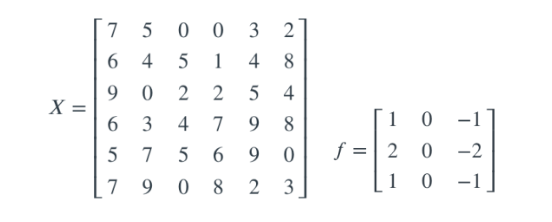

Compute the following:
1. What are the dimensions of the input and the kernel (or filter)? How many parameters
are there in the kernel f? [2 points]
2. What is the output activation map when you apply the convolutional operation using the
filter f on the input X without padding? [4 points]
3. What is the output when you apply a max-pooling operation on the output from the
previous question? [4 points]
Note: For parts 2 and 3 in question 3, please provide the actual output. You can work this one
out by hand or write your own code to do it. Provide documentation of how you got the outputs.